# 글씨체 찾기 프로젝트

In [1]:
import numpy as np
from keras.preprocessing.image import *
from keras.applications.vgg16 import VGG16, decode_predictions
import os
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.preprocessing.image import *
import pandas as pd
from keras.models import Sequential
from keras.layers import *

In [2]:
train_datagen=ImageDataGenerator(rescale=1./255, rotation_range=15,#0~15,
                  width_shift_range=0.1,#좌우로 각각10픽셀 이내
                  height_shift_range=0.1,#상하로
                  shear_range=0.5, #변형
                  zoom_range=[0.8,2.0],#최소 0.8배 최대 2배
                  horizontal_flip=True,
                  vertical_flip=True)

In [3]:
img = load_img('안녕하세요/장정은/장정은1.png')
x = img_to_array(img) # shape => (24, 24, 3)
x= x.reshape((1,) + x.shape) # 앞에 1은 이미지가 한개 임

In [4]:
i = 1
for batch in train_datagen.flow(x, batch_size = 1 , save_to_dir='mywriting', save_prefix = '정은', save_format = 'png'):
    if i >50:
        break
    i += 1

In [5]:
img = load_img('안녕하세요/김진현/김진현1.png')
x = img_to_array(img) # shape => (24, 24, 3)
x= x.reshape((1,) + x.shape) # 앞에 1은 이미지가 한개 임

In [6]:
i = 1
for batch in train_datagen.flow(x, batch_size = 1 , save_to_dir='mywriting', save_prefix = '진현', save_format = 'png'):
    if i >50:
        break
    i += 1

# VGG 적용

In [7]:
vgg = VGG16()
vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

# 파일크기 적용

In [8]:
IMAGE_WIDTH = 128
IMAGE_HEIGHT = 128
IMAGE_SIZE = (IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNEL = 3

In [9]:
filenames=os.listdir("mywriting")
filenames

['정은_0_108.png',
 '정은_0_1304.png',
 '정은_0_1490.png',
 '정은_0_1498.png',
 '정은_0_1507.png',
 '정은_0_1796.png',
 '정은_0_1841.png',
 '정은_0_1876.png',
 '정은_0_1979.png',
 '정은_0_2096.png',
 '정은_0_21.png',
 '정은_0_2132.png',
 '정은_0_2154.png',
 '정은_0_2159.png',
 '정은_0_2333.png',
 '정은_0_2575.png',
 '정은_0_2697.png',
 '정은_0_2773.png',
 '정은_0_2855.png',
 '정은_0_2951.png',
 '정은_0_3008.png',
 '정은_0_3174.png',
 '정은_0_3214.png',
 '정은_0_3277.png',
 '정은_0_3283.png',
 '정은_0_332.png',
 '정은_0_3356.png',
 '정은_0_343.png',
 '정은_0_3433.png',
 '정은_0_3449.png',
 '정은_0_3755.png',
 '정은_0_3777.png',
 '정은_0_401.png',
 '정은_0_4011.png',
 '정은_0_4056.png',
 '정은_0_4129.png',
 '정은_0_4233.png',
 '정은_0_4237.png',
 '정은_0_4316.png',
 '정은_0_4326.png',
 '정은_0_4386.png',
 '정은_0_4449.png',
 '정은_0_465.png',
 '정은_0_4706.png',
 '정은_0_4757.png',
 '정은_0_4978.png',
 '정은_0_4994.png',
 '정은_0_5063.png',
 '정은_0_5085.png',
 '정은_0_5114.png',
 '정은_0_5222.png',
 '정은_0_5450.png',
 '정은_0_5492.png',
 '정은_0_5596.png',
 '정은_0_5806.png',
 '정은_0_5906.png',

In [10]:
categories = []
for fn in filenames: 
    category = fn.split('_')[0]
    if category == '정은':
        categories.append(1)
    else:
        categories.append(0)

# 데이터 프레임화 하기

In [11]:
df = pd.DataFrame({'filenames': filenames, 'category': categories})
df

,filenames,category
0,정은_0_108.png,1
1,정은_0_1304.png,1
2,정은_0_1490.png,1
3,정은_0_1498.png,1
4,정은_0_1507.png,1
...,...,...
197,진현_0_9660.png,0
198,진현_0_9716.png,0
199,진현_0_9811.png,0
200,진현_0_9922.png,0


# 카테고리 별 개수확인

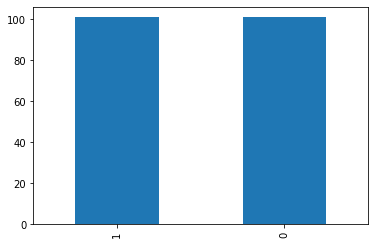

In [12]:
df['category'].value_counts().plot.bar()

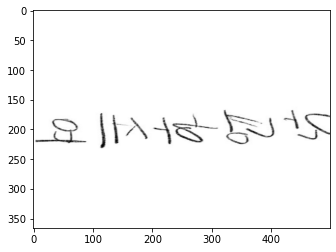

In [13]:
sample = random.choice(filenames)
img = load_img('mywriting/'+sample)
plt.imshow(img)

In [14]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNEL)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

# model.add(Conv2D(32, (3,3), activation='relu'))
# model.add(MaxPooling2D(pool_size = (2,2)))
# model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.55))
model.add(Dense(2, activation = 'sigmoid'))

In [15]:
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'] )
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 128)       7

In [16]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience=10)
lrr = ReduceLROnPlateau(monitor = 'val_acc', patience = 2, facrtor = 0.5,  mim_lr = 0.00001)
callback = [earlystop, lrr]

In [17]:
df['category'] = df['category'].replace({0:'진현', 1:'정은'})

In [18]:
trainDf, valDF = train_test_split(df, test_size = 0.2, random_state = 42)
trainDf['category'].value_counts()

진현    82
정은    79
Name: category, dtype: int64

In [19]:
totalTrain = trainDf.shape[0]
totalVal = valDF.shape[0]
batch_size = 4

In [20]:
trainDf.head() #데티어 프레임으로 저장됨

trainDf = trainDf.reset_index(drop =True)
valDF = valDF.reset_index(drop = True)

In [21]:
trainDatagen = ImageDataGenerator(rotation_range= 15 , rescale = 1./255, shear_range=0.1, zoom_range=0.2, horizontal_flip=True, width_shift_range=0.1, height_shift_range=0.1)

trainGenerator = trainDatagen.flow_from_dataframe(trainDf, 'mywriting/', x_col='filenames', y_col='category', target_size=IMAGE_SIZE, class_mode='categorical', batch_size= batch_size)

Found 161 validated image filenames belonging to 2 classes.


In [22]:
validDatagen = ImageDataGenerator(rescale = 1./255)

vaildGenerator = trainDatagen.flow_from_dataframe(trainDf, 'mywriting/', x_col='filenames', y_col='category', target_size=IMAGE_SIZE, class_mode='categorical', batch_size= batch_size)

Found 161 validated image filenames belonging to 2 classes.


In [23]:
exampleDf = trainDf.sample(1).reset_index(drop = True)


exampleGenerator = trainDatagen.flow_from_dataframe(exampleDf, 'mywriting/', x_col='filenames', y_col='category', target_size=IMAGE_SIZE, class_mode='categorical', batch_size= batch_size)

Found 1 validated image filenames belonging to 1 classes.


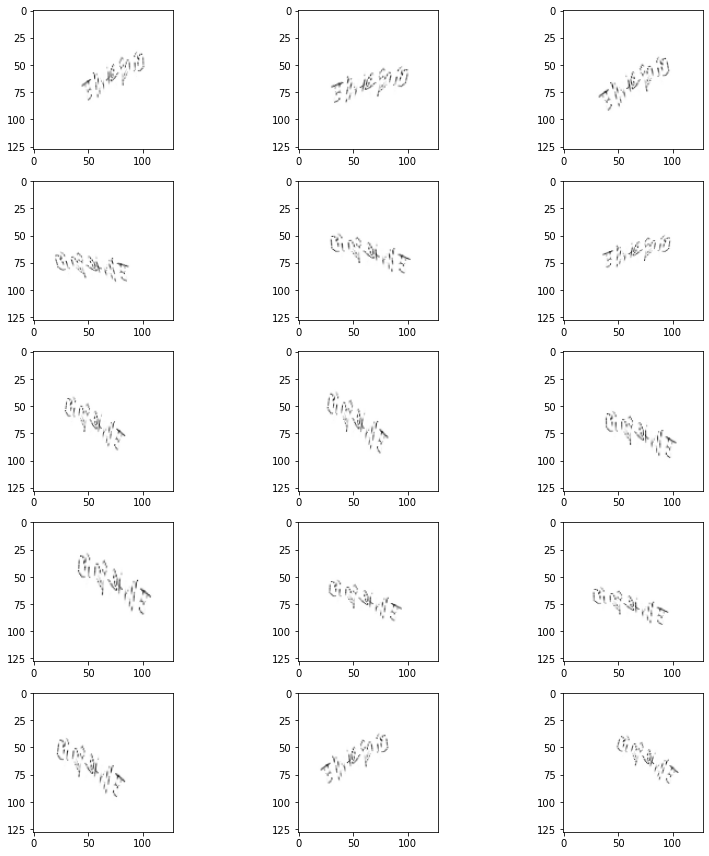

In [24]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5,3,i+1)
    for xb, yb in exampleGenerator:
        img = xb[0]
        plt.imshow(img)
        break
plt.tight_layout()
plt.show()

In [25]:
totalTrain = trainDf.shape[0]
totalValid = valDF.shape[0]
print(totalTrain, totalValid)

161 41


In [26]:
epochs = 8
history = model.fit_generator(
    trainGenerator, 
    epochs= epochs,
    validation_data = vaildGenerator,
    validation_steps=totalValid//batch_size,
    steps_per_epoch=totalTrain//batch_size,
    callbacks = callback
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/8
40/40 [==============================] - 9s 223ms/step - loss: 0.8511 - accuracy: 0.5096 - val_loss: 0.6921 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/8
40/40 [==============================] - 9s 228ms/step - loss: 0.6884 - accuracy: 0.5414 - val_loss: 1.8983 - val_accuracy: 0.5500 - lr: 0.0010
Epoch 3/8
40/40 [==============================] - 10s 242ms/step - loss: 0.6589 - accuracy: 0.8025 - val_loss: 0.2224 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 4/8
40/40 [==============================] - 9s 223ms/step - loss: 0.1312 - accuracy: 0.9490 - val_loss: 0.0327 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 5/8
40/40 [==============================] - 9s 229ms/step - loss: 0.1119 - accuracy: 0.9745 - val_loss: 0.0123 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 6/8
40/40 [==============================] - 9s 224ms/step - loss: 0.1224 - accuracy: 0.9809 - val_loss: 0.0163 - val_accuracy: 1.0000 - lr: 0.0010